In [1]:
import os
import cv2
import numpy as np

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

import matplotlib.pyplot as plt


folder_dir = '/content/drive/MyDrive/Flower Detection/flowers'


In [2]:

data = []
label = []

SIZE = 128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue


In [3]:
data_arr = np.array(data)
label_arr = np.array(label)

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [6]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 234ms/step - accuracy: 0.2806 - loss: 1.5485 - val_accuracy: 0.4215 - val_loss: 1.3218
Epoch 2/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.3933 - loss: 1.3735 - val_accuracy: 0.5162 - val_loss: 1.2340
Epoch 3/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.4508 - loss: 1.3025 - val_accuracy: 0.5439 - val_loss: 1.1538
Epoch 4/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.4930 - loss: 1.2391 - val_accuracy: 0.5797 - val_loss: 1.0868
Epoch 5/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.5326 - loss: 1.1896 - val_accuracy: 0.5670 - val_loss: 1.0871
Epoch 6/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.5575 - loss: 1.1302 - val_accuracy: 0.6028 - val_loss: 1.0441
Epoch 7/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.5605 - loss: 1.0925 - val_accuracy: 0.6109 - val_loss: 1.0118
Epoch 8/64
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.5940 - loss: 1

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


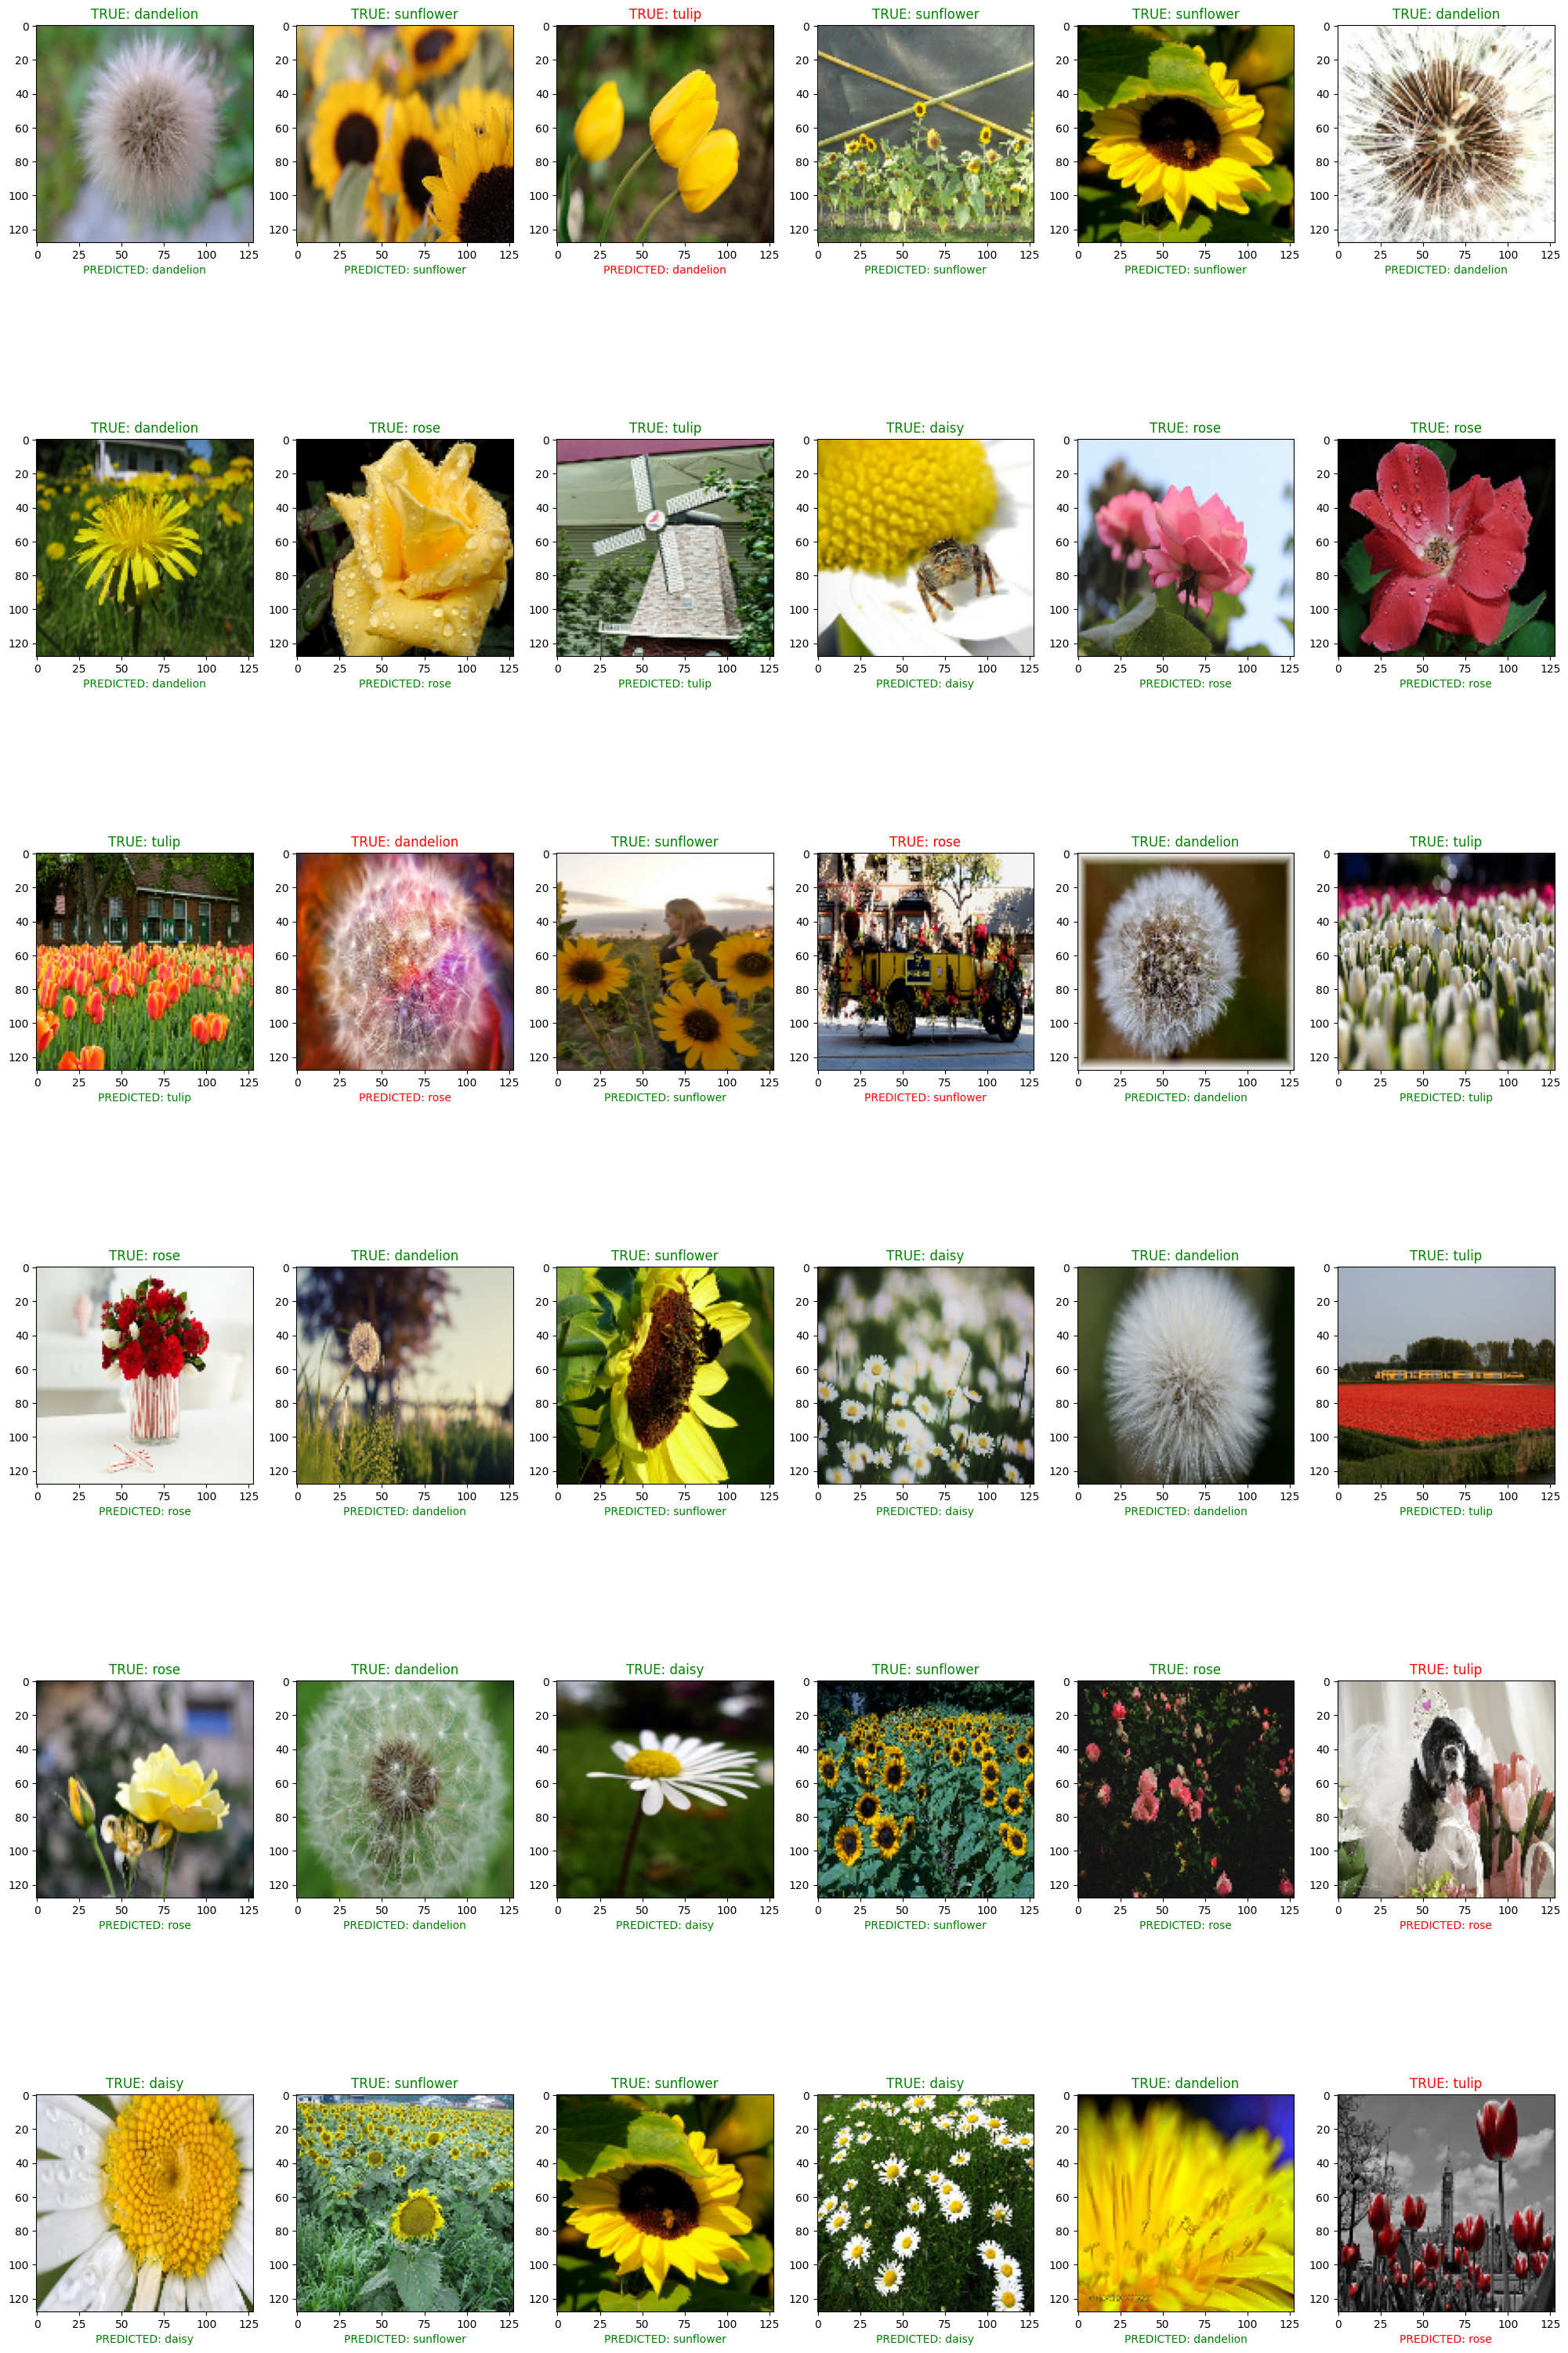

In [9]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

Saving 102501987_3cdb8e5394_n.jpg to 102501987_3cdb8e5394_n.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

🟢 Predicted Flower: rose


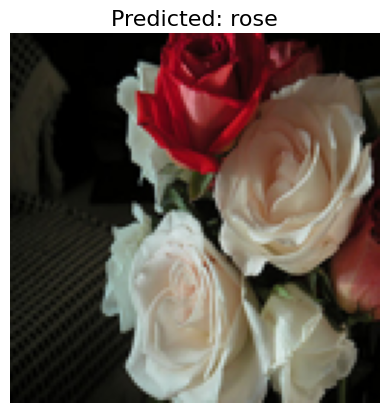

In [10]:
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = Image.open(img_path).convert("RGB")
    img = img.resize((SIZE, SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = encoder.inverse_transform([predicted_class])[0]

    print(f"\n🟢 Predicted Flower: {predicted_label}")
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}", fontsize=16)
    plt.show()
